In [3]:
%pip install -r requirements.txt --user

  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
     ---------------------------------------- 14.0/14.0 MB 6.1 MB/s eta 0:00:00
  Using cached pandas-1.4.2-cp39-cp39-win_amd64.whl (10.5 MB)
     -------------------------------------- 965.4/965.4 kB 5.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 5.2 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow 2.10.0 requires h5py>=2.9.0, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, which is not installed.
tensorflow 2.10.0 requires typing-extensions>=3.6.6, which is not installed.
tensorflow 2.10.0 requires wrapt>=1.11.0, which is not installed.
tensorboard 2.10.1 requires google-auth<3,>=1.6.3, which is not installed.
tensorboard 2.10.1 requires grpcio>=1.24.3, which is not installed.
tensorboard 2.10.1 requires markdown>=2.6.8, which is not installed.
tensorboard 2.10.1 requires 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc


In [2]:
df= pd.read_csv('imports.csv')
df.head()


,id,MDAnalysis,nglview,tensorflow,pickle,numpy,os,warnings,pandas,xgboost,...,LSTMlm,LSTMlm_ctx,data_pre,matplot,comp_alchemy,Config2,cugraph,shutils,pmf,logit
0,1.txt,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.txt,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100.txt,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1000.txt,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10000.txt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
tmp = df.iloc[:, 1:]
tmp.head()

,MDAnalysis,nglview,tensorflow,pickle,numpy,os,warnings,pandas,xgboost,math,...,LSTMlm,LSTMlm_ctx,data_pre,matplot,comp_alchemy,Config2,cugraph,shutils,pmf,logit
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.drop(columns=tmp.columns[tmp.sum() <= 40])
df = df.loc[~(df.iloc[:, 1:]==0).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31878 entries, 1 to 32446
Columns: 175 entries, id to missingno
dtypes: int64(174), object(1)
memory usage: 42.8+ MB


In [5]:
df.sum()

id                10.txt100.txt1000.txt10000.txt10001.txt10002.t...
tensorflow                                                     3112
pickle                                                         1451
numpy                                                         23734
os                                                             6415
                                        ...                        
fbprophet                                                        61
pdb                                                              78
tensorflow_hub                                                   44
netCDF4                                                          73
missingno                                                        69
Length: 175, dtype: object

In [6]:
df.to_csv('preprocessing_imports.csv')

In [16]:
X=df.values[:, 1:]
print(X)

[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


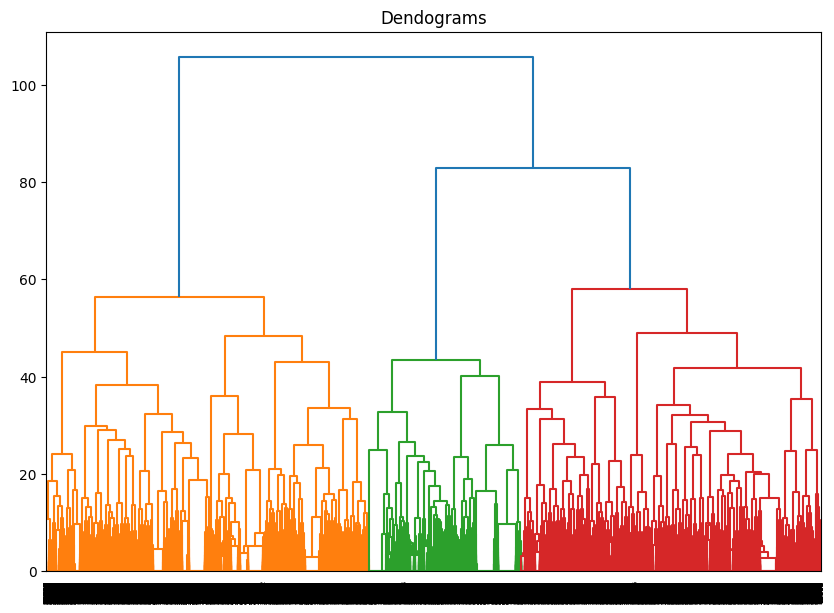

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))